# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
2. Scroll down to API and click Create New API Token.
3. Open up `kaggle.json` and use the username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-65.6.3-py3-none-any.whl (1.2 MB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.6/226.6 kB 124.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!pip install -U kaggle
!ln -s /root/.local/bin/kaggle /usr/bin/kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-7.0.0-py2.py3-none-any.whl (9.4 kB)


In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "kkpdealwis"
kaggle_key = "ebbd1ebd896473f5a41249ad8c2b2766"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms

In [6]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 7.49MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [7]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train["datetime"]=pd.to_datetime(train["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test["datetime"]=pd.to_datetime(test["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv("submission.csv")
submission["datetime"]=pd.to_datetime(submission["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,24.224512
1,2011-01-20 01:00:00,41.502090
2,2011-01-20 02:00:00,45.746605
3,2011-01-20 03:00:00,48.688057
4,2011-01-20 04:00:00,51.911980


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:
train.loc[:, ~train.columns.isin(["casual","registered"])]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [12]:
predictor = TabularPredictor(label="count", eval_metric="r2").fit(
    train_data=train.loc[:,~train.columns.isin(["casual","registered"])],
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_174719/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_174719/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.914241      15.953332  557.184676                0.000714           0.232360            3       True         14
1   RandomForestMSE_BAG_L2   0.913321      12.279399  410.721593                0.594196          25.639470            2       True         12
2          LightGBM_BAG_L2   0.907342      11.899988  408.365075                0.214785          23.282953            2       True         11
3          CatBoost_BAG_L2   0.905658      11.745479  449.248689                0.060276          64.166567            2       True         13
4        LightGBMXT_BAG_L2   0.889639      15.083360  443.863326                3.398158          58.781204            2       True         10
5    KNeighborsDist_BAG_L1   0.784305       0.040394    0.029907                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6857197008702899,
  'KNeighborsDist_BAG_L1': 0.7843047406609882,
  'LightGBMXT_BAG_L1': 0.4732562269834053,
  'LightGBM_BAG_L1': 0.476531925532341,
  'RandomForestMSE_BAG_L1': 0.5860271

### Create predictions from test dataset

In [14]:
predictions = predictor.predict(test)
predictions.head()

0    23.855486
1    41.170837
2    45.279480
3    48.577114
4    51.585819
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [15]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.964684
std        89.989250
min         2.925068
25%        20.424541
50%        64.157501
75%       167.523148
max       365.714844
Name: count, dtype: float64

In [16]:
# How many negative values do we have?
(predictions<0).sum().sum()

0

In [17]:
# Set them to zero
predictions.iloc[predictions<0] = 0
predictions.lt(0).value_counts()

False    6493
Name: count, dtype: int64

### Set predictions to submission dataframe, save, and submit

In [18]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [19]:
submission

,datetime,count
0,2011-01-20 00:00:00,23.855486
1,2011-01-20 01:00:00,41.170837
2,2011-01-20 02:00:00,45.279480
3,2011-01-20 03:00:00,48.577114
4,2011-01-20 04:00:00,51.585819
...,...,...
6488,2012-12-31 19:00:00,162.433990
6489,2012-12-31 20:00:00,162.486359
6490,2012-12-31 21:00:00,157.577621
6491,2012-12-31 22:00:00,154.563431


In [20]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 361kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [21]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission.csv               2023-01-08 17:59:30  first raw submission                 complete  1.79267      1.79267       
submission_new_hpo_3.csv     2023-01-08 15:13:10  new features with hyperparameters-3  complete  1.78169      1.78169       
submission_new_hpo_3.csv     2023-01-08 15:12:23  new features with hyperparameters-3  complete  1.86412      1.86412       
submission_new_hpo_2.csv     2023-01-08 14:50:47  new features with hyperparameters-2  complete  1.86412      1.86412       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

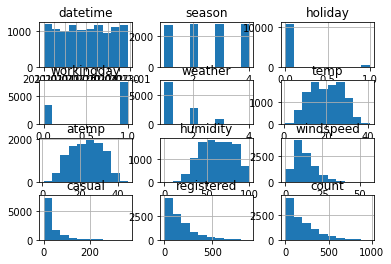

In [22]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [23]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [24]:
# create a new feature
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day

In [25]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19


In [26]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [27]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
train["day"] = train["day"].astype("category")
train["month"] = train["month"].astype("category")
train["year"] = train["year"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")
test["day"] = test["day"].astype("category")
test["month"] = test["month"].astype("category")
test["year"] = test["year"].astype("category")

In [28]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1


In [29]:
train.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                category
month               category
day                 category
dtype: object

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>],
       [<AxesSubplot:title={'center':'count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

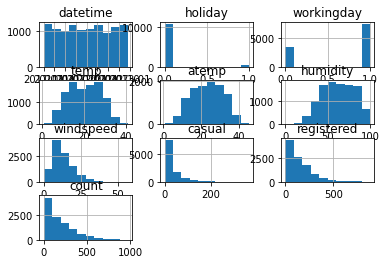

In [30]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [31]:
predictor_new_features = TabularPredictor(label="count", eval_metric="r2").fit(
    train_data=train.loc[:,~train.columns.isin(["casual","registered"])],
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_180024/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_180024/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [32]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.914439      15.090119  518.917070                0.000991           0.302856            3       True         14
1   RandomForestMSE_BAG_L2   0.913670      10.239207  423.098797                0.588895          27.417547            2       True         12
2          LightGBM_BAG_L2   0.907068       9.929475  419.824601                0.279162          24.143351            2       True         11
3          CatBoost_BAG_L2   0.899148       9.773544  445.101773                0.123231          49.420523            2       True         13
4        LightGBMXT_BAG_L2   0.881128      14.221071  467.053317                4.570759          71.372066            2       True         10
5    KNeighborsDist_BAG_L1   0.784305       0.043148    0.034190                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6857197008702899,
  'KNeighborsDist_BAG_L1': 0.7843047406609882,
  'LightGBMXT_BAG_L1': 0.47781124875147507,
  'LightGBM_BAG_L1': 0.4763421261293649,
  'RandomForestMSE_BAG_L1': 0.58508

In [33]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    22.552162
1    43.523987
2    47.603989
3    50.847095
4    53.168602
Name: count, dtype: float32

In [34]:
predictions_new_features.describe()

count    6493.000000
mean      101.457756
std        89.247139
min         3.383986
25%        23.094288
50%        63.891449
75%       166.935944
max       362.908752
Name: count, dtype: float64

In [35]:
predictions_new_features.iloc[predictions_new_features<0] = 0
predictions_new_features.lt(0).value_counts()

False    6493
Name: count, dtype: int64

In [36]:
# Same submitting predictions
submission_new_features=pd.read_csv("submission_new_features.csv")
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [37]:
submission_new_features=pd.read_csv("submission_new_features.csv")
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,22.552162
1,2011-01-20 01:00:00,43.523987
2,2011-01-20 02:00:00,47.603990
3,2011-01-20 03:00:00,50.847095
4,2011-01-20 04:00:00,53.168602


In [38]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 352kB/s]
Successfully submitted to Bike Sharing Demand

In [39]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-01-08 18:15:27  new features                         complete  1.75515      1.75515       
submission.csv               2023-01-08 17:59:30  first raw submission                 complete  1.79267      1.79267       
submission_new_hpo_3.csv     2023-01-08 15:13:10  new features with hyperparameters-3  complete  1.78169      1.78169       
submission_new_hpo_3.csv     2023-01-08 15:12:23  new features with hyperparameters-3  complete  1.86412      1.86412       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [40]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="r2").fit(
    train_data=train.loc[:,~train.columns.isin(["casual","registered"])],
    time_limit=600,
    num_bag_folds=5,
    num_bag_sets=1,
    num_stack_levels=1,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_181547/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_181547/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

In [41]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.915246       9.959728  517.067924                0.000865           0.322439            3       True         16
1   RandomForestMSE_BAG_L2   0.913699       8.965695  413.617740                0.616781          29.319261            2       True         13
2     ExtraTreesMSE_BAG_L2   0.910979       8.975878  393.213032                0.626963           8.914553            2       True         15
3          LightGBM_BAG_L2   0.906555       8.635199  399.746396                0.286285          15.447917            2       True         12
4          CatBoost_BAG_L2   0.905300       8.428835  463.063755                0.079920          78.765276            2       True         14
5        LightGBMXT_BAG_L2   0.879023      12.320819  428.282305                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6857197008702899,
  'KNeighborsDist_BAG_L1': 0.7843047406609882,
  'LightGBMXT_B

In [42]:
test.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
year                category
month               category
day                 category
dtype: object

In [43]:
predictions_new_hpo_1 = predictor_new_hpo.predict(test)
predictions_new_hpo_1.head()

0    22.846794
1    42.461533
2    45.514290
3    48.565498
4    51.122074
Name: count, dtype: float32

In [45]:
# Remember to set all negative values to zero
predictions_new_hpo_1.iloc[predictions_new_hpo_1<0] = 0
predictions_new_hpo_1.lt(0).value_counts()

False    6493
Name: count, dtype: int64

In [46]:
# Same submitting predictions
submission_new_hpo=pd.read_csv("submission_new_hpo.csv")
submission_new_hpo["count"] = predictions_new_hpo_1
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [47]:
submission_new_hpo = pd.read_csv("submission_new_hpo.csv")
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,22.846794
1,2011-01-20 01:00:00,42.461533
2,2011-01-20 02:00:00,45.514290
3,2011-01-20 03:00:00,48.565500
4,2011-01-20 04:00:00,51.122074


In [48]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 360kB/s]
Successfully submitted to Bike Sharing Demand

In [49]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-08 18:27:55  new features with hyperparameters    complete  1.76904      1.76904       
submission_new_features.csv  2023-01-08 18:15:27  new features                         complete  1.75515      1.75515       
submission.csv               2023-01-08 17:59:30  first raw submission                 complete  1.79267      1.79267       
submission_new_hpo_3.csv     2023-01-08 15:13:10  new features with hyperparameters-3  complete  1.78169      1.78169       


In [50]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="r2").fit(
    train_data=train.loc[:,~train.columns.isin(["casual","registered"])],
    time_limit=600,
    num_bag_folds=0,
    num_bag_sets=20,
    num_stack_levels=0,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_182808/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_182808/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

[1000]	valid_set's l2: 17785.9	valid_set's r2: 0.467589
[2000]	valid_set's l2: 17581.6	valid_set's r2: 0.473717
[3000]	valid_set's l2: 17581.2	valid_set's r2: 0.473774


	0.4753	 = Validation score   (r2)
	6.38s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 592.47s of the 592.47s of remaining time.
	0.4801	 = Validation score   (r2)
	1.9s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 590.36s of the 590.35s of remaining time.
	0.5523	 = Validation score   (r2)
	10.03s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 578.02s of the 578.02s of remaining time.
	0.4561	 = Validation score   (r2)
	60.95s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 516.94s of the 516.94s of remaining time.
	0.507	 = Validation score   (r2)
	4.81s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 509.9s of the 509.9s of remaining time.
	0.4533	 = Validation score   (r2)
	11.26s	

In [51]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        KNeighborsDist   0.744221       0.008501   0.017601                0.008501           0.017601            1       True          2
1   WeightedEnsemble_L2   0.744221       0.008988   0.388157                0.000486           0.370557            2       True         12
2        KNeighborsUnif   0.639545       0.009353   0.019519                0.009353           0.019519            1       True          1
3       RandomForestMSE   0.552256       0.151571  10.030766                0.151571          10.030766            1       True          5
4         ExtraTreesMSE   0.506987       0.151938   4.812635                0.151938           4.812635            1       True          7
5         LightGBMLarge   0.484611       0.043214   2.690436                0.043214           2.690436 

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.6395447258765232,
  'KNeighborsDist': 0.7442206313772077,
  'LightGBMXT': 0.4752539154016644,
  'LightGBM': 0.48013160195009386,
  'RandomForestMSE': 0.5522559886727701,
  'CatBoost': 0.456135156583804,
  'ExtraTreesMSE': 0.5069868671160374,
  'NeuralNetFastAI': 0.45334709924523453,
  'XGBoost': 0.4600416658641776,
  'NeuralNetTorch': 0.4165057458848799,
  'LightGBMLarge': 0.48461059437774623,
  'WeightedEnsemble_L2': 0.7442206313772077},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'Autogluo

In [52]:
predictions_new_hpo2 = predictor_new_hpo.predict(test)
predictions_new_hpo2.head()

0    51.861626
1    56.686295
2    59.077763
3    60.468830
4    61.419930
Name: count, dtype: float32

In [54]:
# Remember to set all negative values to zero
predictions_new_hpo2.iloc[predictions_new_hpo2<0] = 0
predictions_new_hpo2.lt(0).value_counts()

False    6493
Name: count, dtype: int64

In [55]:
# Same submitting predictions
submission_new_hpo_2=pd.read_csv("submission_new_hpo_2.csv")
submission_new_hpo_2["count"] = predictions_new_hpo2
submission_new_hpo_2.to_csv("submission_new_hpo_2.csv", index=False)

In [56]:
submission_new_hpo_2 = pd.read_csv("submission_new_hpo_2.csv")
submission_new_hpo_2.head()

,datetime,count
0,2011-01-20 00:00:00,51.861626
1,2011-01-20 01:00:00,56.686295
2,2011-01-20 02:00:00,59.077763
3,2011-01-20 03:00:00,60.468830
4,2011-01-20 04:00:00,61.419930


In [57]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_2.csv -m "new features with hyperparameters-2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 345kB/s]
Successfully submitted to Bike Sharing Demand

In [58]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo_2.csv     2023-01-08 19:37:19  new features with hyperparameters-2  complete  1.86412      1.86412       
submission_new_hpo.csv       2023-01-08 18:27:55  new features with hyperparameters    complete  1.76904      1.76904       
submission_new_features.csv  2023-01-08 18:15:27  new features                         complete  1.75515      1.75515       
submission.csv               2023-01-08 17:59:30  first raw submission                 complete  1.79267      1.79267       


In [59]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="r2").fit(
    train_data=train.loc[:,~train.columns.isin(["casual","registered"])],
    time_limit=600,
    num_bag_folds=10,
    num_bag_sets=20,
    num_stack_levels=3,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_193732/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=10, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_193732/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [60]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L4   0.914630      16.502663  470.382809                0.000799           0.244362            4       True         17
1      WeightedEnsemble_L3   0.914583      11.239460  249.124061                0.000892           0.282502            3       True         12
2          CatBoost_BAG_L3   0.914014      15.722999  420.925414                0.128303          55.058805            3       True         16
3   RandomForestMSE_BAG_L2   0.913533      10.863276  218.541711                0.609134          23.828250            2       True         10
4          LightGBM_BAG_L3   0.912076      15.730667  392.000288                0.135971          26.133679            3       True         14
5      WeightedEnsemble_L5   0.911628      17.657711  572.376247                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L3': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L3': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L3': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L4': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L4': 'StackerEnsembleModel_LGB'

In [61]:
predictions_new_hpo3 = predictor_new_hpo.predict(test)
predictions_new_hpo3.head()

0    30.362534
1    41.916786
2    44.927795
3    49.933197
4    52.006050
Name: count, dtype: float32

In [62]:
# Remember to set all negative values to zero
predictions_new_hpo3.iloc[predictions_new_hpo3<0] = 0
predictions_new_hpo3.lt(0).value_counts()

False    6493
Name: count, dtype: int64

In [63]:
# Same submitting predictions
submission_new_hpo_3=pd.read_csv("submission_new_hpo_3.csv")
submission_new_hpo_3["count"] = predictions_new_hpo3
submission_new_hpo_3.to_csv("submission_new_hpo_3.csv", index=False)

In [64]:
submission_new_hpo = pd.read_csv("submission_new_hpo_3.csv")
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,30.362534
1,2011-01-20 01:00:00,41.916786
2,2011-01-20 02:00:00,44.927795
3,2011-01-20 03:00:00,49.933197
4,2011-01-20 04:00:00,52.006050


In [65]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_3.csv -m "new features with hyperparameters-3"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 414kB/s]
Successfully submitted to Bike Sharing Demand

In [66]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo_3.csv     2023-01-08 20:54:35  new features with hyperparameters-3  complete  1.77159      1.77159       
submission_new_hpo_2.csv     2023-01-08 19:37:19  new features with hyperparameters-2  complete  1.86412      1.86412       
submission_new_hpo.csv       2023-01-08 18:27:55  new features with hyperparameters    complete  1.76904      1.76904       
submission_new_features.csv  2023-01-08 18:15:27  new features                         complete  1.75515      1.75515       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

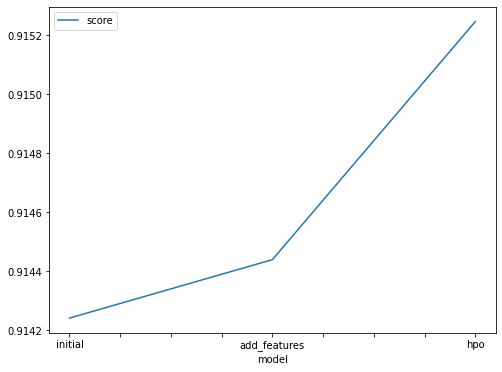

In [67]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [0.914241, 0.914439, 0.915246]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

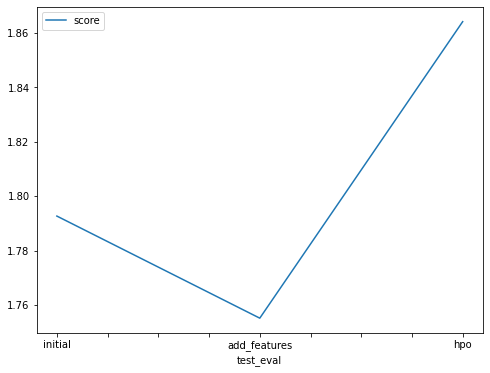

In [68]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79267, 1.75515, 1.86412]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [69]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "net_bag_folds": [0, 0, 0],
    "net_bag_sets": [1, 1, 20],
    "net_stack_levels": [0, 0, 0],
    "score": [1.79267, 1.75515, 1.86412]
})

,model,net_bag_folds,net_bag_sets,net_stack_levels,score
0,initial,0,1,0,1.79267
1,add_features,0,1,0,1.75515
2,hpo,0,20,0,1.86412
